<h1 style="text-align:center;">Лабораторна робота 4</h1>

<p><b>Тема:</b> OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version) </p>
<p><b>Мета:</b> знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.</p>
<h2 style="font-weight:bold; font-size:22px;">Завдання для самостійної роботи</h2>
<a href="https://www.geeksforgeeks.org/python/negative-transformation-of-an-image-using-python-and-opencv/">1. Негатив</a>

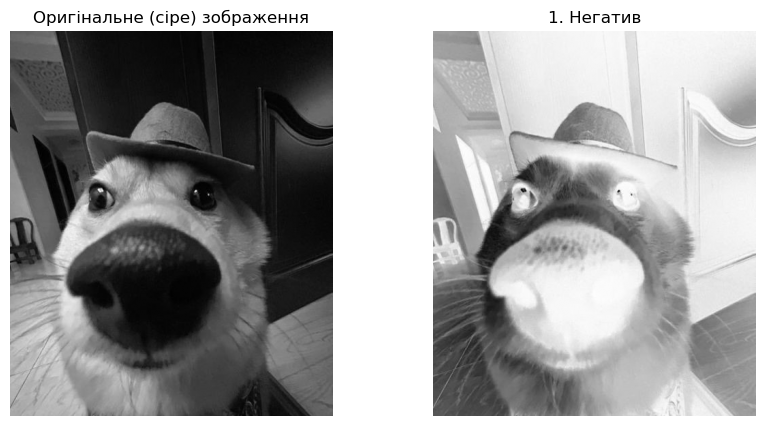

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"ПОМИЛКА: Не вдалося завантажити зображення. Перевірте шлях: {image_path}")
else:
    image_negative = cv.bitwise_not(image_gray)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре) зображення")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_negative, cmap='gray')
    plt.title('1. Негатив')
    plt.axis('off')

    plt.show()

<p>Формула градаційного перетворення для Негативу:<br>s = (L - 1) - r</p>

<a href="https://www.geeksforgeeks.org/python/log-transformation-of-an-image-using-python-and-opencv/">2. Логарифмічні перетворення</a>

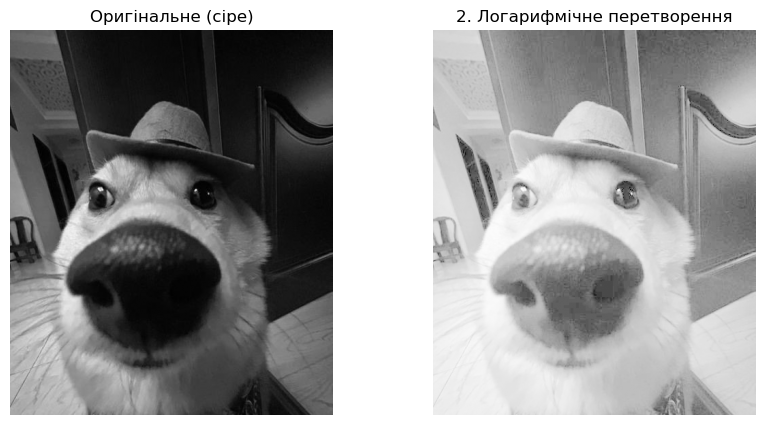

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
else:
    c = 255 / np.log(1 + 255)

    log_image = c * np.log1p(image_gray.astype(np.float64))

    image_log = np.array(log_image, dtype=np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_log, cmap='gray')
    plt.title('2. Логарифмічне перетворення')
    plt.axis('off')

    plt.show()

<p>Формула градаційного перетворення для Логарифмічного перетворення:<br>s = c * log(1 + r)</p>

<a href="https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html">3. Степенева(гамма-коеркція)</a>

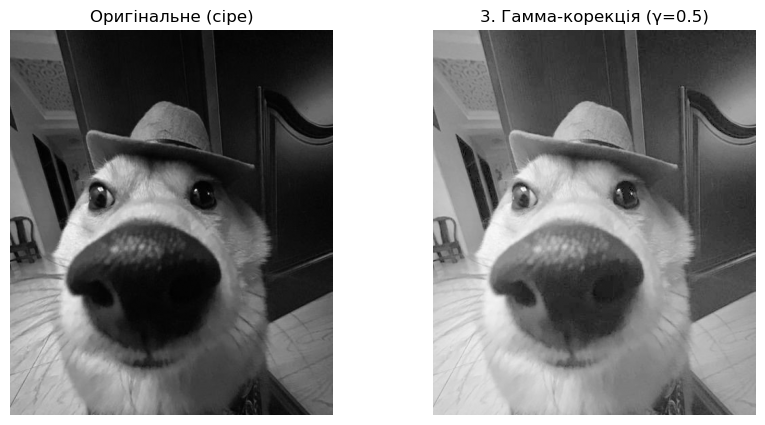

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
else:
    gamma = 0.5 

    image_norm = image_gray.astype(np.float64) / 255.0

    image_gamma_corrected = np.power(image_norm, gamma)

    image_gamma = np.array(image_gamma_corrected * 255, dtype=np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gamma, cmap='gray')
    plt.title(f'3. Гамма-корекція (γ={gamma})')
    plt.axis('off')

    plt.show()

<p>Формула градаційного перетворення для Степеневої (гамма-корекції):<br>s = c r^gamma</p>

<a href="https://msameeruddin.hashnode.dev/solarizing-the-image-with-numpy">4. Соляризація зображення</a>

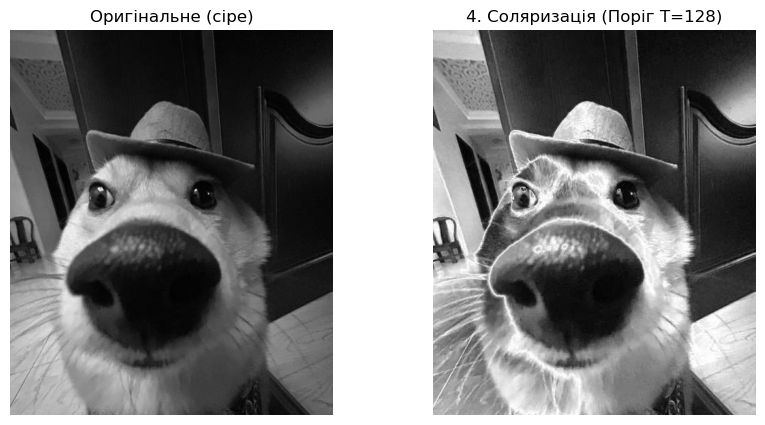

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
else:
    T = 128

    image_solarized = image_gray.copy()

    high_pixels_mask = (image_gray >= T)

    image_solarized[high_pixels_mask] = 255 - image_solarized[high_pixels_mask]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_solarized, cmap='gray')
    plt.title(f'4. Соляризація (Поріг T={T})')
    plt.axis('off')

    plt.show()

<p>Ось формула градаційного перетворення для Соляризації:<br>
    Це кусково-лінійна функція, яка визначається порогом T:</p>
$$
s = \begin{cases}
r & \text{якщо } r < T \\
(L - 1) - r & \text{якщо } r \ge T
\end{cases}
$$

<h2 style="font-weight:bold; font-size:22px;">Відозміна гістограми</h2>
<a href="https://habr.com/ru/articles/244507/">5. Еквалізація гістограми 1</a>
<p>І ще приклад <a href="https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html">тут</a></p>

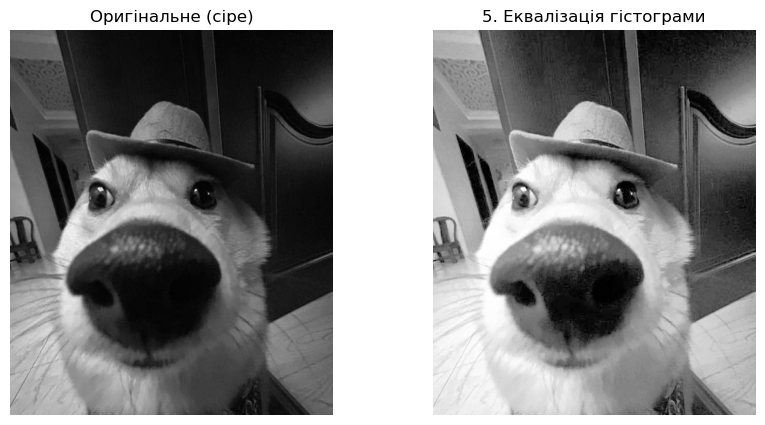

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
else:
    image_equalized = cv.equalizeHist(image_gray)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('5. Еквалізація гістограми')
    plt.axis('off')

    plt.show()

<p>Еквалізація (або вирівнювання) гістограми — це метод, який автоматично покращує глобальний контраст зображення.<br>
Він ґрунтується на аналізі гістограми зображення, тобто розподілу пікселів за їхньою яскравістю (від 0 до 255).<br>
Сенс методу полягає в тому, щоб перетворити початковий розподіл яскравостей на рівномірний (або "плаский"). Це досягається шляхом "розтягування" тих діапазонів яскравостей, які зустрічаються найчастіше, і "стискання" тих, що зустрічаються рідко.<br>
В результаті темні ділянки стають темнішими, а світлі — світлішими, що робить зображення значно чіткішим. Цей метод особливо ефективний для зображень, які є занадто темними, занадто світлими або мають низький контраст.</p>

<a href="https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a">6. Оцінка гістограми</a><br>
<a href="https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html">Ще одне посилання</a>

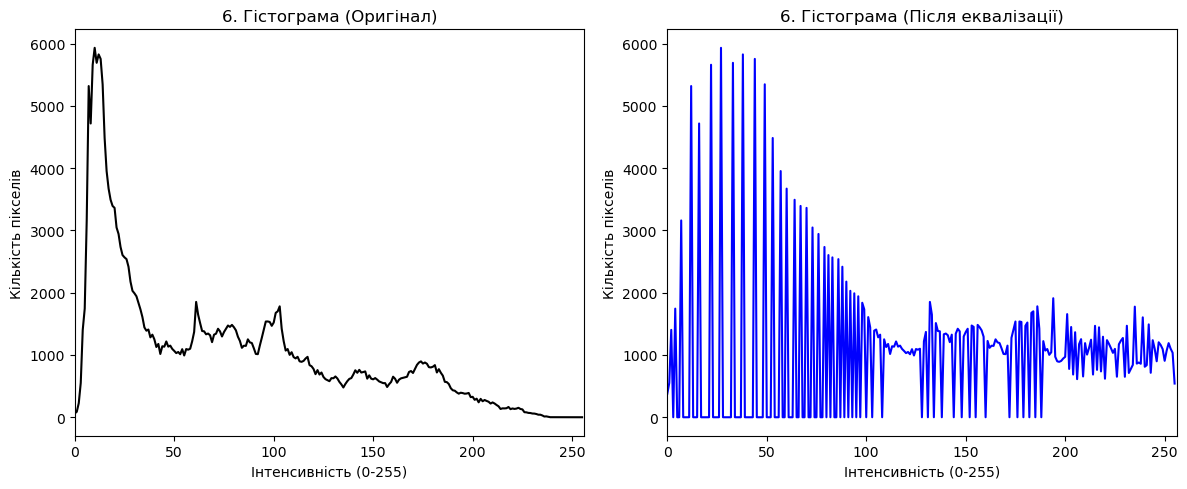

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'scr/123.jpg' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
else:
    hist_original = cv.calcHist([image_gray], [0], None, [256], [0, 256])

    image_equalized = cv.equalizeHist(image_gray)
    hist_equalized = cv.calcHist([image_equalized], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist_original, color='black')
    plt.title('6. Гістограма (Оригінал)')
    plt.xlabel('Інтенсивність (0-255)')
    plt.ylabel('Кількість пікселів')
    plt.xlim([0, 256])

    plt.subplot(1, 2, 2)
    plt.plot(hist_equalized, color='blue')
    plt.title('6. Гістограма (Після еквалізації)')
    plt.xlabel('Інтенсивність (0-255)')
    plt.ylabel('Кількість пікселів')
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

<p>Оцінка гістограми — це процес аналізу графіка розподілу інтенсивностей (яскравостей) пікселів у зображенні.<br>
Гістограма показує, скільки пікселів кожного рівня яскравості (від 0 до 255) присутньо на зображенні. Візуально це дозволяє швидко оцінити загальні характеристики зображення:</p>
<ol>
    <li>Чи є воно темним (більшість пікселів зліва).</li>
    <li>Чи є воно світлим (більшість пікселів справа).</li>
    <li>Чи має воно низький контраст (всі пікселі скупчені у вузькому діапазоні).</li>
</ol>
<p>Оцінка гістограми дозволяє обґрунтувати вибір оптимального значення порогу для бінаризації. Якщо гістограма має два чіткі піки (бімодальний розподіл), які зазвичай відповідають фону та об'єкту, то оптимальним порогом є значення яскравості, що знаходиться в "долині" (локальному мінімумі) між цими двома піками.</p>

<h2 style="font-weight:bold; font-size:22px;">Контрольні запитання</h2>

<ol>
    <li>У чому полягає сенс градаційних перетворень?</li><br>
    <p>Сенс градаційних перетворень полягає у зміні яскравості (інтенсивності) пікселів для модифікації зображення.<br>
    Це точкові операції, які працюють в околі 1x1. Це означає, що нове значення яскравості пікселя (s) залежить лише від його початкового значення (r) згідно з певною функцією перетворення (s = T(r)).</p>
    <li>На чому ґрунтуються гістограмні методи?</li><br>
    <p>Гістограмні методи ґрунтуються на статистичному аналізі розподілу пікселів за їхньою яскравістю у всьому зображенні.<br>
    На відміну від градаційних перетворень (які дивляться на кожен піксель окремо), ці методи спочатку аналізують гістограму — графік, що показує, скільки пікселів кожного рівня яскравості (від 0 до 255) присутньо на зображенні.<br>
    Ця статистична інформація потім використовується для модифікації зображення, наприклад:</p>
    <ul>Еквалізація гістограми: "Розтягування" діапазону яскравостей для посилення контрасту.</ul>
    <ul>Оцінка гістограми: Використовується для знаходження оптимального порогу (наприклад, для бінаризації).</ul>
</ol>